<a href="https://colab.research.google.com/github/KarenParraA/ColabNotebooks/blob/main/ML_TRABAJOFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Taller Final: Visualización y Clustering**


##Nombre: Karen Parra
## Descripción

- Crear segmentos de clientes para una campaña de marketing para que un banco obtenga mas prestamos. 

## Requisitos

###Librerias para visualizacion y clustering

- Numpy
- Matplotlib
- Seaborn

##Resolución: Plantilla

###1. Importar las librerías necesarias para el procesamiento, visualización y segmentación de datos

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

###2.	Cargue los datos en un DataFrame y visualice las cinco primeras filas.

In [2]:
bank_loan_dataset = 'https://raw.githubusercontent.com/PacktPublishing/Data-Science-for-Marketing-Analytics-Second-Edition/master/Chapter04/Datasets/Bank_Personal_Loan_Modelling-1.csv'
bank_loan_modelling = pd.read_csv(bank_loan_dataset)
bank_loan_modelling.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


###2. Usando el método info, obtenga información de las columnas y sus tipos

In [3]:
bank_loan_modelling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


###3. Realice un escalado estándar en las columnas Income y CCAvg. Crear nuevas columnas Income_scaled y CCAvg_scaled. Realizar un análisis descriptivo de las columnas procesadas para verificar que el escalado se aplicó correctamente

In [4]:
escalado = StandardScaler()

In [5]:
columnas_escaladas = ['Income', 'CCAvg']
datos_escalados = bank_loan_modelling.copy()
nuevas_columnas = ['Income_scaled', 'CCAvg_scaled']
datos_escalados[nuevas_columnas] = escalado.fit_transform(datos_escalados[columnas_escaladas])
datos_escalados[columnas_escaladas].head(5)

,Income,CCAvg
0,49,1.6
1,34,1.5
2,11,1.0
3,100,2.7
4,45,1.0


In [6]:
datos_escalados.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Income_scaled,CCAvg_scaled
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5.000000e+03,5.000000e+03
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000,1.449507e-16,-6.394885e-17
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637,1.000100e+00,1.000100e+00
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-1.428969e+00,-1.108987e+00
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-7.554825e-01,-7.084116e-01
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,-2.123482e-01,-2.506106e-01
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000,5.263146e-01,3.216407e-01
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000,3.263712e+00,4.613525e+00


Podemos observar que la edad promedia esta en 45 años, un ingreso medio de 73 mil dolares, y una experiencia promedio de 20 años.

Analizando los valores mínimos y máximos no se observan valores atípicos.

###4. Realice el clustering de k-means, usando Income y CCAvg como características, usando 3 cluster. Especificar random_state como 42. Crear una nueva columna "Cluster" que contenga el cluster predicho.

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


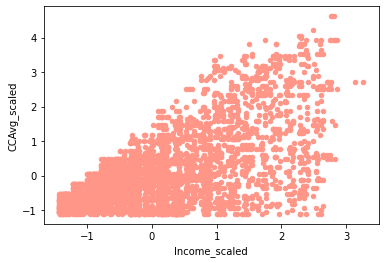

In [7]:
datos_escalados.plot.scatter(x='Income_scaled', y='CCAvg_scaled', \
                         color='#ff9688')
plt.show()

Se observa: 

*   Un area concentrada en bajos ingresos y bajo gasto en tarjetas de credito.
*   Un área levemente densa en ingresos medios y gastos de bajos a medios.
*   Un área dispersa en ingresos altos y gastos  de bajos a altos.



In [8]:
model = KMeans(n_clusters=3, random_state=42)

In [9]:
columnas_cluster = ['Income','CCAvg']
modelo = model.fit(datos_escalados[columnas_cluster])
datos_escalados['Cluster'] = model.predict(datos_escalados[columnas_cluster])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
model.predict(datos_escalados[columnas_cluster])

array([1, 1, 1, ..., 1, 1, 2], dtype=int32)

In [13]:
datos_escalados['Cluster']

0       1
1       1
2       1
3       2
4       1
       ..
4995    1
4996    1
4997    1
4998    1
4999    2
Name: Cluster, Length: 5000, dtype: int32

In [14]:
datos_escalados.head(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Income_scaled,CCAvg_scaled,Cluster
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,-0.538229,-0.193385,1
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,-0.864109,-0.250611,1
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,-1.363793,-0.536736,1


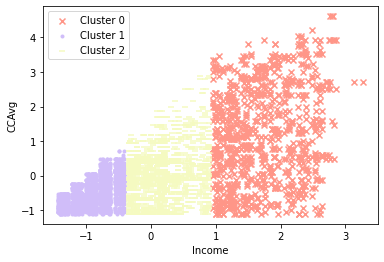

In [20]:
markers = ['x', '.', '_']
colors = ["#ff9688","#d0bdf9","#f5fac1"]

for clust in range(3):
    temp = datos_escalados[datos_escalados.Cluster == clust]
    plt.scatter(temp.Income_scaled, temp.CCAvg_scaled, \
                marker=markers[clust], \
                c=colors[clust],\
                label="Cluster "+str(clust))
plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.legend()
plt.show()

##Resolución: Analisis de Clusters

### Para entender los clusters, imprima los valores medios Income y CCAvg para los tres clusters.


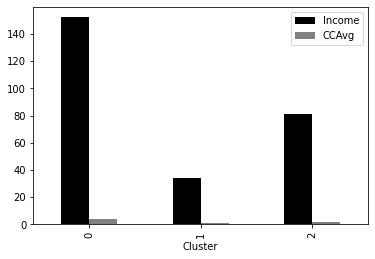

In [23]:
datos_escalados['Cluster'] = datos_escalados["Cluster"]
datos_escalados.groupby('Cluster')[['Income', 'CCAvg']].mean().plot.bar(color=['black','grey'])
plt.show()

Podemos observar que este gráfico no nos brinda mucha información, porque el peso de cada variable es difente

###Realice una comparación visual de los clusters utilizando los valores estandarizados de Income y CCAvg.

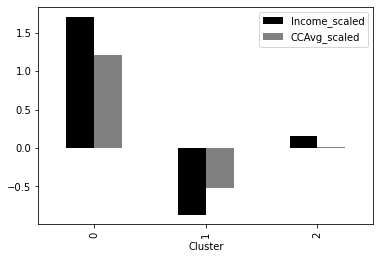

In [24]:
datos_escalados['Cluster'] = datos_escalados["Cluster"]
datos_escalados.groupby('Cluster')[['Income_scaled', 'CCAvg_scaled']].mean().plot.bar(color=['black','grey'])
plt.show()

### Imprima los valores medios de los clusters para las características Edad, Hipoteca, Familia, Tarjeta de crédito, Online y Préstamo personal.

In [27]:
datos_escalados.groupby('Cluster')["Age","Mortgage","Family","CCAvg","Income","CreditCard","Online","Personal Loan"].mean()

<ipython-input-27-95eb5b16a5f2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  datos_escalados.groupby('Cluster')["Age","Mortgage","Family","CCAvg","Income","CreditCard","Online","Personal Loan"].mean()


,Age,Mortgage,Family,CCAvg,Income,CreditCard,Online,Personal Loan
Cluster,,,,,,,,
0,44.432755,91.629067,1.965293,4.041714,152.253796,0.295011,0.606291,0.413232
1,45.883978,40.040976,2.500921,1.034337,33.962247,0.296501,0.588398,0.000000
2,45.154774,58.259706,2.485834,1.949974,81.178909,0.290661,0.601784,0.051941


###Compruebe que cluster tiene tiene la mayor propensión a pedir un préstamo personal.

El cluster que tiene mayor propensión a pedir un préstamo personal, es el cluster 0, que corresponde a las personas con mayores ingresos. Sin embargo, varios de ellos ya han establecido un préstamo con el banco. Por lo tanto, seria interesante actuar  no solo sobre los clientes de segmentación cluster 0, si no tambien cluster 1, que todavía no establecen ese tipo de relación con el banco. 

### Asigne etiquetas descriptivas a los cluster y descríbalos para el equipo de marketing

In [31]:
datos_escalados["Clientes_para_prestamos_personales"]= np.where(datos_escalados["Cluster"] == 0, 'Clientes reales', \
                                  np.where(datos_escalados["Cluster"] == 1, 'Clientes con posible potencial',"Clientes con poco potencial"))


datos_escalados.groupby("Clientes_para_prestamos_personales")[["Age","Mortgage","Family","Income","CCAvg","CreditCard","Online","Personal Loan"]].mean()

,Age,Mortgage,Family,Income,CCAvg,CreditCard,Online,Personal Loan
Clientes_para_prestamos_personales,,,,,,,,
Clientes con poco potencial,45.154774,58.259706,2.485834,81.178909,1.949974,0.290661,0.601784,0.051941
Clientes con posible potencial,45.883978,40.040976,2.500921,33.962247,1.034337,0.296501,0.588398,0.000000
Clientes reales,44.432755,91.629067,1.965293,152.253796,4.041714,0.295011,0.606291,0.413232
